In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-air-quality-and-respiratory-health-outcomes/air_quality_health_dataset.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/global-air-quality-and-respiratory-health-outcomes/air_quality_health_dataset.csv")

In [4]:
data.head()

,city,date,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,population_density,hospital_capacity
0,Los Angeles,2020-01-01,65,34.0,52.7,2.2,38.5,33.5,33,5,Rural,1337
1,Beijing,2020-01-02,137,33.7,31.5,36.7,27.5,-1.6,32,4,Urban,1545
2,London,2020-01-03,266,43.0,59.6,30.4,57.3,36.4,25,10,Suburban,1539
3,Mexico City,2020-01-04,293,33.7,37.9,12.3,42.7,-1.0,67,10,Urban,552
4,Delhi,2020-01-05,493,50.3,34.8,31.2,35.6,33.5,72,9,Suburban,1631


In [5]:
data.shape

(88489, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   city                 88489 non-null  object 
 1   date                 88489 non-null  object 
 2   aqi                  88489 non-null  int64  
 3   pm2_5                88489 non-null  float64
 4   pm10                 88489 non-null  float64
 5   no2                  88489 non-null  float64
 6   o3                   88489 non-null  float64
 7   temperature          88489 non-null  float64
 8   humidity             88489 non-null  int64  
 9   hospital_admissions  88489 non-null  int64  
 10  population_density   88489 non-null  object 
 11  hospital_capacity    88489 non-null  int64  
dtypes: float64(5), int64(4), object(3)
memory usage: 8.1+ MB


In [7]:
data['city'].value_counts()

city
Delhi          26465
Beijing        22064
Mexico City    13377
Los Angeles     9003
London          6985
Tokyo           6147
Cairo           2700
São Paulo       1748
Name: count, dtype: int64

In [8]:
data.describe()

,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,hospital_capacity
count,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000,88489.000000
mean,249.370182,35.144951,50.118654,30.006211,39.978895,17.522962,56.950966,8.049385,1024.463165
std,144.479132,14.767994,19.796392,9.963139,12.007258,12.961024,21.629675,3.715458,561.978071
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,20.000000,0.000000,50.000000
25%,124.000000,24.900000,36.600000,23.300000,31.900000,6.400000,38.000000,6.000000,539.000000
50%,249.000000,35.100000,50.000000,30.000000,40.000000,17.500000,57.000000,8.000000,1026.000000
75%,374.000000,45.200000,63.500000,36.700000,48.100000,28.700000,76.000000,10.000000,1511.000000
max,499.000000,109.900000,143.500000,71.400000,93.500000,40.000000,94.000000,25.000000,1999.000000


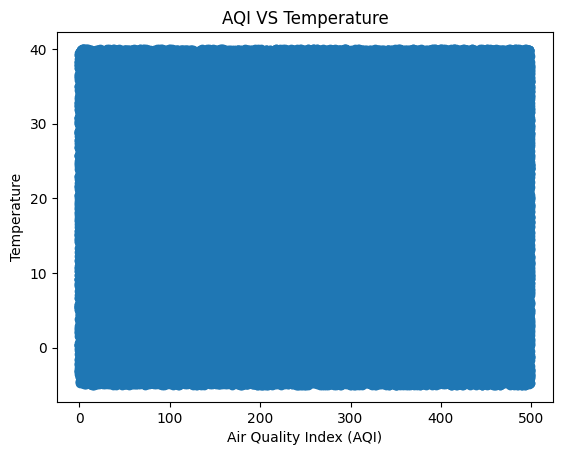

In [9]:
plt.scatter(data['aqi'],data['temperature'])
plt.xlabel("Air Quality Index (AQI)")
plt.ylabel("Temperature")
plt.title("AQI VS Temperature")
plt.show()

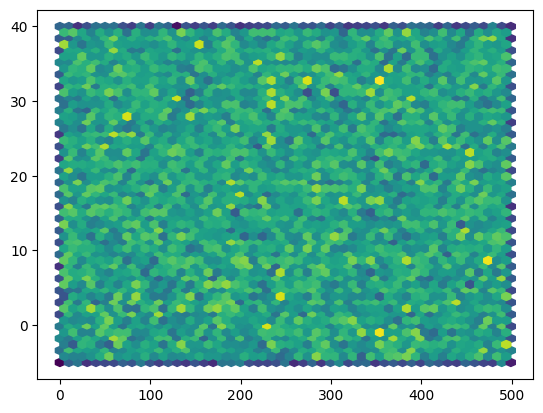

In [10]:
plt.hexbin(data['aqi'],data['temperature'], gridsize=50, cmap='viridis')

In [11]:
data['aqi'].corr(data['temperature'])

-0.004377410570559118

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


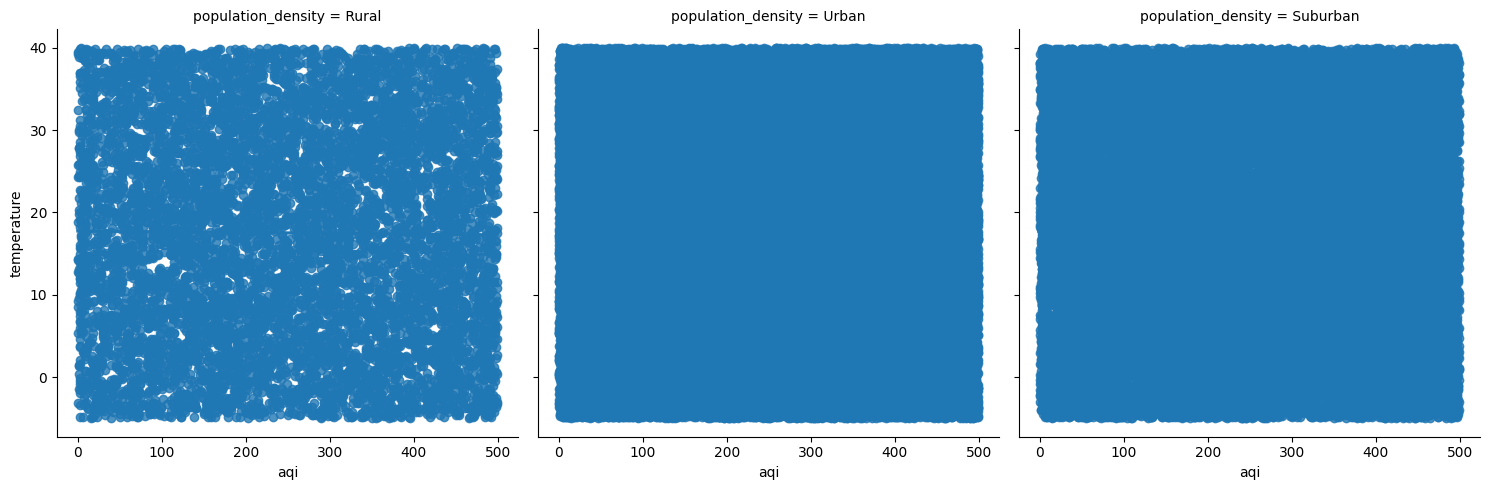

In [12]:
sns.lmplot(x='aqi', y='temperature', col='population_density', data=data)

In [13]:
urban_corr = data[data['population_density'] == 'Urban']['aqi'].corr(data[data['population_density'] == 'Urban']['temperature'])
rural_corr = data[data['population_density'] == 'Rural']['aqi'].corr(data[data['population_density'] == 'Rural']['temperature'])
suburban = data[data['population_density'] == 'Suburban']['aqi'].corr(data[data['population_density'] == 'Suburban']['temperature'])
print('Urban = ',urban_corr)
print('Rural = ', rural_corr)
print('Suburban = ',suburban)

Urban =  -0.005559841212808234
Rural =  -0.010316608351565957
Suburban =  1.4627451529538394e-05


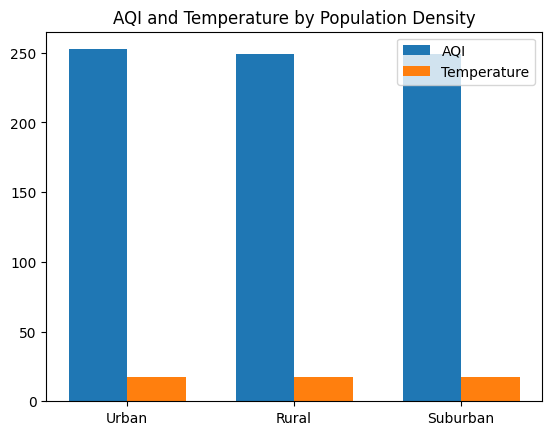

In [14]:
import numpy as np

labels = ['Urban', 'Rural','Suburban']
aqi = data.groupby('population_density')['aqi'].mean()
temp = data.groupby('population_density')['temperature'].mean()

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x - width/2, aqi, width, label='AQI')
ax.bar(x + width/2, temp, width, label='Temperature')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_title('AQI and Temperature by Population Density')
ax.legend()
plt.show()


In [15]:
data['date'] = pd.to_datetime(data['date'])
data['date_numeric'] = data['date'].apply(lambda x: x.timestamp())

In [16]:
data['date_numeric'].head()

0    1.577837e+09
1    1.577923e+09
2    1.578010e+09
3    1.578096e+09
4    1.578182e+09
Name: date_numeric, dtype: float64

In [17]:
#implementing onehotencoding
data_encoded = pd.get_dummies(data, columns=['city','population_density']).astype(int)
print(data_encoded.head())

                  date  aqi  pm2_5  pm10  no2  o3  temperature  humidity  \
0  1577836800000000000   65     34    52    2  38           33        33   
1  1577923200000000000  137     33    31   36  27           -1        32   
2  1578009600000000000  266     43    59   30  57           36        25   
3  1578096000000000000  293     33    37   12  42           -1        67   
4  1578182400000000000  493     50    34   31  35           33        72   

   hospital_admissions  hospital_capacity  ...  city_Cairo  city_Delhi  \
0                    5               1337  ...           0           0   
1                    4               1545  ...           0           0   
2                   10               1539  ...           0           0   
3                   10                552  ...           0           0   
4                    9               1631  ...           0           1   

   city_London  city_Los Angeles  city_Mexico City  city_São Paulo  \
0            0              

In [18]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   date                         88489 non-null  int64
 1   aqi                          88489 non-null  int64
 2   pm2_5                        88489 non-null  int64
 3   pm10                         88489 non-null  int64
 4   no2                          88489 non-null  int64
 5   o3                           88489 non-null  int64
 6   temperature                  88489 non-null  int64
 7   humidity                     88489 non-null  int64
 8   hospital_admissions          88489 non-null  int64
 9   hospital_capacity            88489 non-null  int64
 10  date_numeric                 88489 non-null  int64
 11  city_Beijing                 88489 non-null  int64
 12  city_Cairo                   88489 non-null  int64
 13  city_Delhi                   88489 non-null  i

In [19]:
data_encoded['date'].head()

0    1577836800000000000
1    1577923200000000000
2    1578009600000000000
3    1578096000000000000
4    1578182400000000000
Name: date, dtype: int64

In [20]:
data = data_encoded.drop(columns=['date'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88489 entries, 0 to 88488
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   aqi                          88489 non-null  int64
 1   pm2_5                        88489 non-null  int64
 2   pm10                         88489 non-null  int64
 3   no2                          88489 non-null  int64
 4   o3                           88489 non-null  int64
 5   temperature                  88489 non-null  int64
 6   humidity                     88489 non-null  int64
 7   hospital_admissions          88489 non-null  int64
 8   hospital_capacity            88489 non-null  int64
 9   date_numeric                 88489 non-null  int64
 10  city_Beijing                 88489 non-null  int64
 11  city_Cairo                   88489 non-null  int64
 12  city_Delhi                   88489 non-null  int64
 13  city_London                  88489 non-null  i

In [22]:
data.head()

,aqi,pm2_5,pm10,no2,o3,temperature,humidity,hospital_admissions,hospital_capacity,date_numeric,...,city_Cairo,city_Delhi,city_London,city_Los Angeles,city_Mexico City,city_São Paulo,city_Tokyo,population_density_Rural,population_density_Suburban,population_density_Urban
0,65,34,52,2,38,33,33,5,1337,1577836800,...,0,0,0,1,0,0,0,1,0,0
1,137,33,31,36,27,-1,32,4,1545,1577923200,...,0,0,0,0,0,0,0,0,0,1
2,266,43,59,30,57,36,25,10,1539,1578009600,...,0,0,1,0,0,0,0,0,1,0
3,293,33,37,12,42,-1,67,10,552,1578096000,...,0,0,0,0,1,0,0,0,0,1
4,493,50,34,31,35,33,72,9,1631,1578182400,...,0,1,0,0,0,0,0,0,1,0


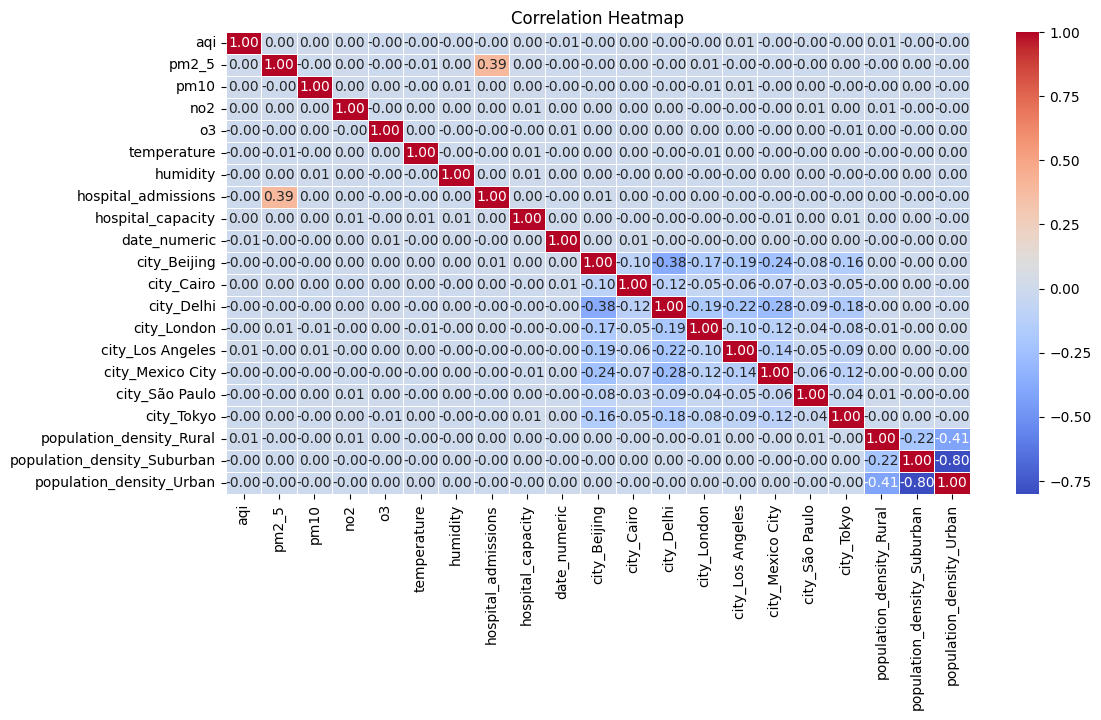

In [23]:
plt.figure(figsize=(12,6))
corr_matrics = data.corr(numeric_only=True)
sns.heatmap(corr_matrics,annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [24]:
# splitting the data into features and targets
# features = data.drop()